In [6]:
#| default_exp app
#|export
from fastai.vision.all import PILImage, load_learner
import gradio as gr
import pathlib
path = pathlib.Path().absolute()

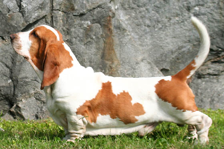

In [4]:
im = PILImage.create('sample.png')
im.thumbnail((256,256))
im

In [8]:
#|export
learn = load_learner(path/'model.pkl')

In [9]:
learn.predict(im)

('basset_hound',
 tensor(14),
 tensor([7.2166e-05, 2.1845e-05, 1.9757e-06, 2.5519e-07, 6.3290e-07, 1.4706e-06,
         1.4955e-04, 2.9546e-05, 1.0739e-06, 8.0044e-07, 1.4865e-07, 1.7576e-06,
         1.3740e-05, 1.0548e-04, 9.1655e-01, 7.9777e-03, 1.6086e-02, 6.1030e-06,
         2.0924e-04, 3.0501e-06, 1.8749e-05, 2.5454e-06, 5.9857e-07, 6.5006e-05,
         6.6570e-06, 2.9866e-06, 5.8025e-06, 4.4344e-06, 1.7933e-05, 4.6376e-06,
         5.8245e-02, 1.4272e-05, 2.7476e-05, 3.2331e-04, 5.4803e-06, 1.8818e-05,
         1.3571e-06]))

In [10]:
#|export
categories = learn.dls.vocab

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [11]:
classify_image(im)

{'Abyssinian': 7.216589438030496e-05,
 'Bengal': 2.1844865841558203e-05,
 'Birman': 1.9757253539864905e-06,
 'Bombay': 2.551851707721653e-07,
 'British_Shorthair': 6.329026405182958e-07,
 'Egyptian_Mau': 1.4705941566717229e-06,
 'Maine_Coon': 0.0001495521719334647,
 'Persian': 2.954615410999395e-05,
 'Ragdoll': 1.0739302069850964e-06,
 'Russian_Blue': 8.00437760517525e-07,
 'Siamese': 1.4865412367726094e-07,
 'Sphynx': 1.7575781612322317e-06,
 'american_bulldog': 1.37401329993736e-05,
 'american_pit_bull_terrier': 0.00010548361751716584,
 'basset_hound': 0.9165529608726501,
 'beagle': 0.007977728731930256,
 'boxer': 0.016085881739854813,
 'chihuahua': 6.103040504967794e-06,
 'english_cocker_spaniel': 0.00020924214913975447,
 'english_setter': 3.0501016681228066e-06,
 'german_shorthaired': 1.874916415545158e-05,
 'great_pyrenees': 2.545411916798912e-06,
 'havanese': 5.985672828501265e-07,
 'japanese_chin': 6.500622112071142e-05,
 'keeshond': 6.657036465185229e-06,
 'leonberger': 2.98662

In [13]:
#|export
examples = ['sample.png']
intf = gr.Interface(fn=classify_image, inputs="image", outputs="label", examples=examples, allow_flagging="never")
intf.launch(inline=False, share=True)



Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://96814f73aadc859111.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


## Export

In [22]:
from nbdev.export import nb_export


In [38]:

nb_export(path/'app.ipynb', path)
